In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning);

import sys
sys.executable

'/home/mingrui/anaconda3/envs/py36_cu90/bin/python'

In [2]:
import os

# plotting
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 3361104647
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 15]

import deephistopath.wsi.slide as slide
import deephistopath.wsi.util as util
import deephistopath.wsi.filter as filter
import deephistopath.wsi.tiles as tiles
util.ADDITIONAL_NP_STATS = True

import py_wsi
import py_wsi.imagepy_toolkit as tk

import pandas as pd
pd.set_option('display.max_columns',None)

Setup your variables

In [3]:
FILE_DIR = '/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/'
DB_DIR = ''
DB_NAME = 'patch_db'
PATCH_SIZE = 512
LEVEL = 15
OVERLAP = 0

FILE = '132240.svs'

In [8]:
def file_stats(file_dir, file_name):
    """
    Print Stats from openslide and py-wsi. Show scaled image at the end.
    
    Args:
        file_dir: The directory containing wsi files.
        file_name: The wsi file name.
    """    
    # info 1
    print('Openslide info:\n')
    slide.single_slide_info(os.path.join(file_dir, file_name))
    print('\n\n\n')
    # info 2
    print('py_wsi info:\n')
    level_count, level_tiles, level_dims = turtle.retrieve_tile_dimensions(FILE, patch_size=128)
    print("Level count:         " + str(level_count))
    print("Level tiles:         " + str(level_tiles))
    print("Level dimensions:    " + str(level_dims))
    # show image
    pil_img , large_h, large_w, new_h, new_w = slide.show_scaled_slide_image(os.path.join(file_dir, file_name))
    imshow(pil_img)
    
    

In [9]:
turtle = py_wsi.Turtle(FILE_DIR, DB_DIR, DB_NAME)

print("Total WSI images:    " + str(turtle.num_files))
print("LMDB name:           " + str(turtle.db_name))
print("File names:          " + str(turtle.files))

12 WSI found in directory.
Total WSI images:    12
LMDB name:           patch_db
File names:          ['132287.svs' '132223.svs' '132217.svs' '132225.svs' '132240.svs'
 '132298.svs' '132242.svs' '132234.svs' '132257.svs' '132214.svs'
 '132247.svs' '132224.svs']


Openslide info:

Level count: 4
Level dimensions: ((91631, 63841), (22907, 15960), (5726, 3990), (2863, 1995))
Level downsamples: (1.0, 4.000096810487825, 16.001435128162704, 32.00287025632541)
Dimensions: (91631, 63841)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7FB43E16B438>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7FB43E16B0F0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x713 at 0x7FB43E16B2E8>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 04/19/18
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 119891
  Property: aperio.Focus Offset, value: -0.000500
  Property: aperio.ICC Profile, value: AT2
  Property: aperio.ImageID, value: 119891
  Property: aperio.Left, value: 23.129263
  Prope

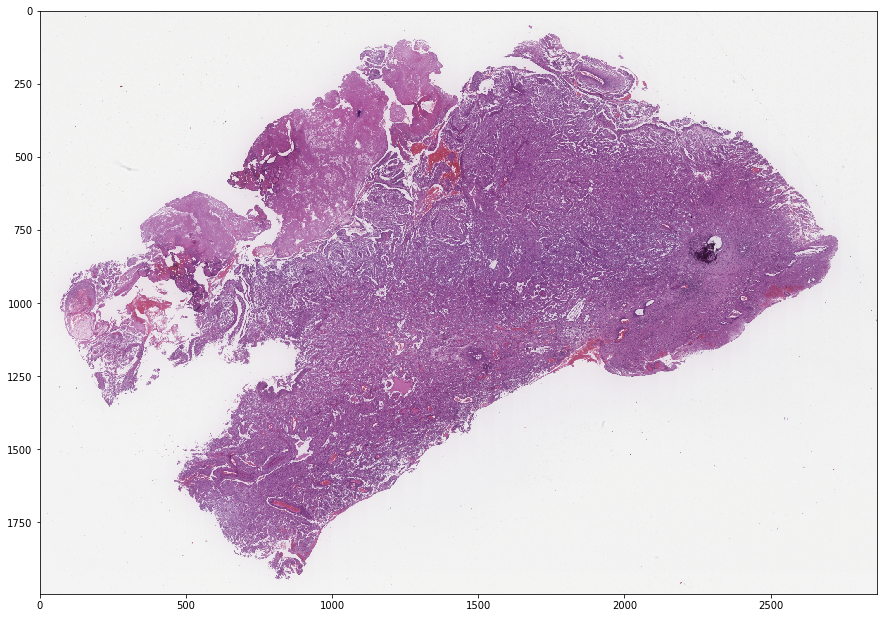

In [10]:
file_stats(FILE_DIR, FILE)

use py_wsi to sample patches, to determine the best size and zoom level

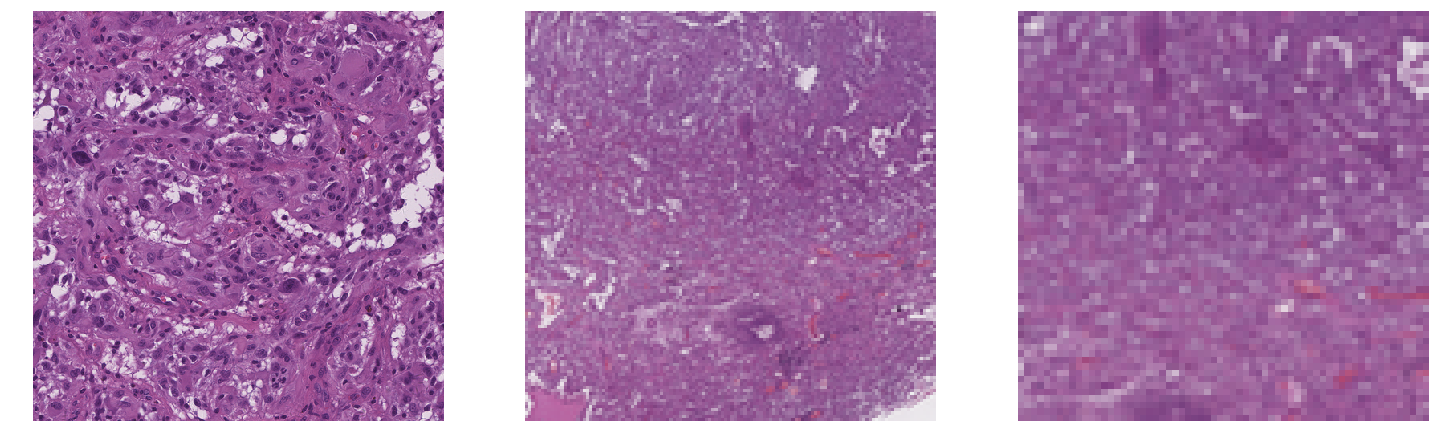

In [7]:
patch_1 = turtle.retrieve_sample_patch(FILE, 512, 15, overlap=12)
patch_2 = turtle.retrieve_sample_patch(FILE, 128, 10, overlap=12)
patch_3 = turtle.retrieve_sample_patch(FILE, 64, 10, overlap=12)
tk.show_images([patch_1, patch_2, patch_3], 3, 1)

#### CAUTION
This is a long running function, ps_wsi turtle will save patches to a lmdb datastore file

In [11]:
patches, coords, classes, labels = turtle.get_patches_from_file(FILE)

[py-wsi]: no labels found for these patches.


In [12]:
len(patches)
len(coords)
len(classes)
len(labels)

1364

1364

1364

0

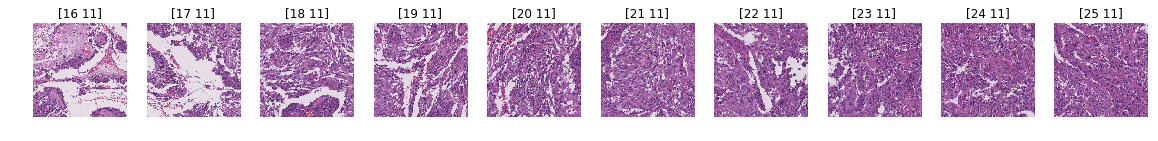

In [13]:
# load patches from lmdb database
tk.show_labeled_patches(patches[500:510], coords[500:510])

#### Use wsi-preprocessing scripts to process image

In [43]:
img_path = slide.convert_slide_to_image(slide_path=os.path.join(FILE_DIR, FILE), slide_number=0)
filtered_np_img, info = filter.apply_filters_to_image(img_path=img_path, slide_num=0)

Saving image to: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/training_png/TUPAC-TR-000-32x-91631x63841-2863x1995.png
True
Processing slide #0
RGB                  | Time: 0:00:00.206164 Min:  14.00  Max: 245.00  Mean: 200.72  Binary: F  Type: uint8   Shape: (1995, 2863, 3)
Save Image           | Time: 0:00:01.871982  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/filter_png/TUPAC-TR-000-001-rgb.png
Save Thumbnail       | Time: 0:00:00.028354  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/filter_thumbnail_jpg/TUPAC-TR-000-001-rgb.jpg
Filter Green Channel | Time: 0:00:00.014435 Min:   0.00  Max:   1.00  Mean:   0.40  Binary: T  Type: bool    Shape: (1995, 2863)
Mask RGB             | Time: 0:00:00.017634 Min:   0.00  Max: 231.00  Mean:  56.69  Binary: F  Type: uint8   Shape: (1995, 2863, 3)
Save Image           | Time: 0:00:00.555665  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/filter_png

In [139]:
tile_sum = tiles.summary_and_tiles(slide_num=0, display=False, save_summary=True, save_data=True, save_top_tiles=False)

RGB                  | Time: 0:00:00.190563 Min:   0.00  Max: 229.00  Mean:  56.21  Binary: F  Type: uint8   Shape: (1995, 2863, 3)
Save Tile Data       | Time: 0:00:00.020686  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_data/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_data.csv
RGB                  | Time: 0:00:00.205819 Min:  14.00  Max: 245.00  Mean: 200.72  Binary: F  Type: uint8   Shape: (1995, 2863, 3)
Save Tile Sum        | Time: 0:00:00.538090  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_summary_png/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_summary.png
Save Tile Sum Thumb  | Time: 0:00:00.029218  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_summary_thumbnail_jpg/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_summary.jpg
Save Tile Sum Orig   | Time: 0:00:01.464355  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_summary_on_original_png/TUPAC-TR-000-32x-916

In [89]:
tile_sum

#### The preprocessed tile results are saved to CSV file, you can take a look at the CSV file in Jupyter

In [106]:
tile_df = pd.read_csv('/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_data/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_data.csv', skiprows=13)

#### You can filter tiles based on some metrics

In [118]:
tissue_df = tile_df[tile_df['Tissue %'] > 80]
score_df = tile_df[tile_df['Score'] > 0.7]

In [121]:
tissue_df.shape
tissue_df.head()

score_df.shape
score_df.head()

(2026, 21)

,Tile Num,Row,Column,Tissue %,Tissue Quantity,Col Start,Row Start,Col End,Row End,Col Size,Row Size,Original Col Start,Original Row Start,Original Col End,Original Row End,Original Col Size,Original Row Size,Color Factor,S and V Factor,Quantity Factor,Score
324,325,4,55,87.01,HIGH,1728,96,1760,128,32,32,55305,3072,56329,4096,1024,1024,1998,1.00,1.0,0.8519
398,399,5,39,98.93,HIGH,1216,128,1248,160,32,32,38918,4096,39942,5120,1024,1024,959,0.16,1.0,0.8314
399,400,5,40,93.55,HIGH,1248,128,1280,160,32,32,39943,4096,40967,5120,1024,1024,749,1.00,1.0,0.8528
411,412,5,52,93.65,HIGH,1632,128,1664,160,32,32,52233,4096,53257,5120,1024,1024,2247,1.00,1.0,0.8713
412,413,5,53,88.96,HIGH,1664,128,1696,160,32,32,53257,4096,54281,5120,1024,1024,1675,1.00,1.0,0.8546


(2209, 21)

,Tile Num,Row,Column,Tissue %,Tissue Quantity,Col Start,Row Start,Col End,Row End,Col Size,Row Size,Original Col Start,Original Row Start,Original Col End,Original Row End,Original Col Size,Original Row Size,Color Factor,S and V Factor,Quantity Factor,Score
308,309,4,39,68.65,MEDIUM,1216,96,1248,128,32,32,38918,3072,39942,4096,1024,1024,1248,1.0,0.2,0.7225
323,324,4,54,78.32,MEDIUM,1696,96,1728,128,32,32,54281,3072,55305,4096,1024,1024,2162,1.0,0.2,0.7883
324,325,4,55,87.01,HIGH,1728,96,1760,128,32,32,55305,3072,56329,4096,1024,1024,1998,1.0,1.0,0.8519
395,396,5,36,68.75,MEDIUM,1120,128,1152,160,32,32,35846,4096,36870,5120,1024,1024,2926,1.0,0.2,0.7508
396,397,5,37,63.38,MEDIUM,1152,128,1184,160,32,32,36870,4096,37894,5120,1024,1024,3789,1.0,0.2,0.7271


In [107]:
# Image('/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_summary_png/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_summary.png')
# Image('/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_summary_thumbnail_jpg/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_summary.jpg')
# Image('/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tile_summary_on_original_png/TUPAC-TR-000-32x-91631x63841-2863x1995-tile_summary.png')
# Image('/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/top_tile_summary_png/TUPAC-TR-000-32x-91631x63841-2863x1995-top_tile_summary.png')